# Purpose

The goal of this script is to visualize the ratios of read counts in introns, comparing a treatment condition to a control. 
These samples were used to test the concentrations of Madrasin and how long the samples were treated with Madrasin. 
I am going to visualize the ratios using a heatmap in seaborn. 

The data was collected by Lela in June 2018. These are the samples:

* Mad-10mm-4hr-DMS=  plus DMS, treated with madrasin 10 uM for 4 hours to impair the U2 snRNP
* Mad-10mm-4hr-minus= minus DMS, treated with madrasin 10 uM for 4 hours to impair the U2 snRNP
* Mad-10mm-8hr-DMS= plus DMS, treated with madrasin 10 uM for 8 hours to impair the U2 snRNP
* Mad-10mm-8hr-minus= minus DMS, treated with madrasin 10 uM for 8 hours to impair the U2 snRNP
* Mad-20mm-4hr-DMS=  plus DMS, treated with madrasin 20 uM for 4 hours to impair the U2 snRNP
* Mad-20mm-4hr-minus= minus DMS, treated with madrasin 20 uM for 4 hours to impair the U2 snRNP
* Mad-20mm-8hr-DMS=  plus DMS, treated with madrasin 20 uM for 8 hours to impair the U2 snRNP
* Mad-20mm-8hr-minus= minus DMS, treated with madrasin 20 uM for 8 hours to impair the U2 snRNP
* Mad-30mm-4hr-DMS=  plus DMS, treated with madrasin 30 uM for 4 hours to impair the U2 snRNP
* Mad-30mm-4hr-minus= minus DMS, treated with madrasin 30 uM for 4 hours to impair the U2 snRNP
* Mad-30mm-8hr-DMS=  plus DMS, treated with madrasin 30 uM for 8 hours to impair the U2 snRNP
* Mad-30mm-8hr-minus= minus DMS, treated with madrasin 30 uM for 8 hours to impair the U2 snRNP



In [ ]:
%%script bash
./ConvertBamToBedGraphAndGetIntronCoverage.sh ../tmp/Lela_MadrasinReadsTest_June2018

In [1]:
# Import all the necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt

In [2]:
# Set up the intitial table using the introns coordinates 
introns_coord_data = pd.read_table("../data/NCBI_RefSeq_Curated_hg38_HighlyExpressedGenes_Introns.bed",sep="\t",header=None)
print introns_coord_data.shape
introns_coord_data.head()

(743, 6)


,0,1,2,3,4,5
0,chr1,92832117,92833388,NM_000969.3_intron_0_0_chr1_92832118_f,0,+
1,chr1,92833458,92833544,NM_000969.3_intron_1_0_chr1_92833459_f,0,+
2,chr1,92833660,92834778,NM_000969.3_intron_2_0_chr1_92833661_f,0,+
3,chr1,92834913,92836189,NM_000969.3_intron_3_0_chr1_92834914_f,0,+
4,chr1,92836392,92837455,NM_000969.3_intron_4_0_chr1_92836393_f,0,+


In [3]:
# Sort the coordinates 
introns_coord_data_sorted = introns_coord_data.sort_values(by=[0,1,2,3])
introns_coord_data_sorted.columns = ["chrom","start","end","intronID","score","strand"]
introns_coord_data_sorted.head()

,chrom,start,end,intronID,score,strand
15,chr1,8861429,8862886,NM_001201483.1_intron_0_0_chr1_8861430_r,0,-
23,chr1,8861429,8862886,NM_001428.3_intron_0_0_chr1_8861430_r,0,-
16,chr1,8862945,8863234,NM_001201483.1_intron_1_0_chr1_8862946_r,0,-
24,chr1,8862945,8863234,NM_001428.3_intron_1_0_chr1_8862946_r,0,-
17,chr1,8863343,8863890,NM_001201483.1_intron_2_0_chr1_8863344_r,0,-


In [4]:
# Reset index of coordinates
introns_coord_data_sorted = introns_coord_data_sorted.reset_index(drop=True)
introns_coord_data_sorted.head()

,chrom,start,end,intronID,score,strand
0,chr1,8861429,8862886,NM_001201483.1_intron_0_0_chr1_8861430_r,0,-
1,chr1,8861429,8862886,NM_001428.3_intron_0_0_chr1_8861430_r,0,-
2,chr1,8862945,8863234,NM_001201483.1_intron_1_0_chr1_8862946_r,0,-
3,chr1,8862945,8863234,NM_001428.3_intron_1_0_chr1_8862946_r,0,-
4,chr1,8863343,8863890,NM_001201483.1_intron_2_0_chr1_8863344_r,0,-


In [5]:
# Read in the Count files 
for filename in os.listdir("../tmp/Lela_MadrasinReadsTest_June2018/"):
    current_columns = list(introns_coord_data_sorted.columns.values)
    if "HighlyExpressedGenesIntrons.txt" in filename and "Quality24_MinLength20_3p" not in filename:
        print filename
        data_to_read = pd.read_csv("../tmp/Lela_MadrasinReadsTest_June2018/"+filename,header=None,sep="\t")
        data_to_read_sorted = data_to_read.sort_values(by=[0,1,2,3])
        data_to_read_sorted = data_to_read_sorted.reset_index(drop=True)
        introns_coord_data_sorted = pd.concat([introns_coord_data_sorted,data_to_read_sorted[6]],axis=1,ignore_index=True)
        current_columns.append(filename.split("_Aligned")[0])
        introns_coord_data_sorted.columns = current_columns

Mad-10mm-4hr-DMS_S1_Aligned.out.Counts.HighlyExpressedGenesIntrons.txt
Standardcontrol_S12_Aligned.out.Counts.HighlyExpressedGenesIntrons.txt
Mad-10mm-8hr-DMS_S7_Aligned.out.Counts.HighlyExpressedGenesIntrons.txt
Mad-30mm-4hr-minus_S6_Aligned.out.Counts.HighlyExpressedGenesIntrons.txt
Mad-20mm-8hr-minus_S11_Aligned.out.Counts.HighlyExpressedGenesIntrons.txt
Mad-30mm-8hr-minus_S12_Aligned.out.Counts.HighlyExpressedGenesIntrons.txt
DMSO-DMS_S8_Aligned.out.Counts.HighlyExpressedGenesIntrons.txt
Mad-30mm-8hr-DMS_S9_Aligned.out.Counts.HighlyExpressedGenesIntrons.txt
Mad-20mm-4hr-minus_S5_Aligned.out.Counts.HighlyExpressedGenesIntrons.txt
Mad-30mm-4hr-DMS_S3_Aligned.out.Counts.HighlyExpressedGenesIntrons.txt
Mad-20mm-8hr-DMS_S8_Aligned.out.Counts.HighlyExpressedGenesIntrons.txt
Mad-20mm-4hr-DMS_S2_Aligned.out.Counts.HighlyExpressedGenesIntrons.txt
Mad-10mm-4hr-minus_S4_Aligned.out.Counts.HighlyExpressedGenesIntrons.txt
Mad-10mm-8hr-minus_S10_Aligned.out.Counts.HighlyExpressedGenesIntrons.txt

In [6]:
introns_coord_data_sorted.head()

,chrom,start,end,intronID,score,strand,Mad-10mm-4hr-DMS_S1,Standardcontrol_S12,Mad-10mm-8hr-DMS_S7,Mad-30mm-4hr-minus_S6,Mad-20mm-8hr-minus_S11,Mad-30mm-8hr-minus_S12,DMSO-DMS_S8,Mad-30mm-8hr-DMS_S9,Mad-20mm-4hr-minus_S5,Mad-30mm-4hr-DMS_S3,Mad-20mm-8hr-DMS_S8,Mad-20mm-4hr-DMS_S2,Mad-10mm-4hr-minus_S4,Mad-10mm-8hr-minus_S10
0,chr1,8861429,8862886,NM_001201483.1_intron_0_0_chr1_8861430_r,0,-,9,20,10,9,11,26,16,9,17,19,21,24,6,24
1,chr1,8861429,8862886,NM_001428.3_intron_0_0_chr1_8861430_r,0,-,9,20,10,9,11,26,16,9,17,19,21,24,6,24
2,chr1,8862945,8863234,NM_001201483.1_intron_1_0_chr1_8862946_r,0,-,3,6,3,4,4,13,5,6,4,9,11,4,6,7
3,chr1,8862945,8863234,NM_001428.3_intron_1_0_chr1_8862946_r,0,-,3,6,3,4,4,13,5,6,4,9,11,4,6,7
4,chr1,8863343,8863890,NM_001201483.1_intron_2_0_chr1_8863344_r,0,-,3,3,2,8,3,14,3,10,5,9,3,8,5,13


## Controls

Comparisons:
* All positive DMS samples against DMSO-DMS
* All negative DMS samples against Standard Control

In [7]:
introns_coord_data_sorted_dropDups = introns_coord_data_sorted.drop_duplicates(subset=["chrom","start","end"])
print introns_coord_data_sorted_dropDups.shape
introns_coord_data_sorted_dropDups.head()

(510, 20)


,chrom,start,end,intronID,score,strand,Mad-10mm-4hr-DMS_S1,Standardcontrol_S12,Mad-10mm-8hr-DMS_S7,Mad-30mm-4hr-minus_S6,Mad-20mm-8hr-minus_S11,Mad-30mm-8hr-minus_S12,DMSO-DMS_S8,Mad-30mm-8hr-DMS_S9,Mad-20mm-4hr-minus_S5,Mad-30mm-4hr-DMS_S3,Mad-20mm-8hr-DMS_S8,Mad-20mm-4hr-DMS_S2,Mad-10mm-4hr-minus_S4,Mad-10mm-8hr-minus_S10
0,chr1,8861429,8862886,NM_001201483.1_intron_0_0_chr1_8861430_r,0,-,9,20,10,9,11,26,16,9,17,19,21,24,6,24
2,chr1,8862945,8863234,NM_001201483.1_intron_1_0_chr1_8862946_r,0,-,3,6,3,4,4,13,5,6,4,9,11,4,6,7
4,chr1,8863343,8863890,NM_001201483.1_intron_2_0_chr1_8863344_r,0,-,3,3,2,8,3,14,3,10,5,9,3,8,5,13
6,chr1,8864092,8865284,NM_001201483.1_intron_3_0_chr1_8864093_r,0,-,8,14,7,19,7,20,10,19,13,17,10,18,10,10
8,chr1,8865482,8866278,NM_001201483.1_intron_4_0_chr1_8865483_r,0,-,9,12,8,12,29,13,9,12,13,6,23,22,24,14


In [8]:
# This new dataframe contains all experiments we want to compare
introns_ratios = pd.DataFrame({"Mad-10mm-4hr-DMS_S1_Vs_DMSO":introns_coord_data_sorted_dropDups["Mad-10mm-4hr-DMS_S1"]/introns_coord_data_sorted_dropDups["DMSO-DMS_S8"],
                              "Mad-10mm-4hr-minus_S4_Vs_StdCntrl":introns_coord_data_sorted_dropDups["Mad-10mm-4hr-minus_S4"]/introns_coord_data_sorted_dropDups["Standardcontrol_S12"],
                               "Mad-10mm-8hr-DMS_S7_Vs_DMSO":introns_coord_data_sorted_dropDups["Mad-10mm-8hr-DMS_S7"]/introns_coord_data_sorted_dropDups["DMSO-DMS_S8"],
                              "Mad-10mm-8hr-minus_S10_Vs_StdCntrl":introns_coord_data_sorted_dropDups["Mad-10mm-8hr-minus_S10"]/introns_coord_data_sorted_dropDups["Standardcontrol_S12"],
                               "Mad-20mm-4hr-DMS_S2_Vs_DMSO":introns_coord_data_sorted_dropDups["Mad-20mm-4hr-DMS_S2"]/introns_coord_data_sorted_dropDups["DMSO-DMS_S8"],
                              "Mad-20mm-4hr-minus_S5_Vs_StdCntrl":introns_coord_data_sorted_dropDups["Mad-20mm-4hr-minus_S5"]/introns_coord_data_sorted_dropDups["Standardcontrol_S12"],
                               "Mad-20mm-8hr-DMS_S8_Vs_DMSO":introns_coord_data_sorted_dropDups["Mad-20mm-8hr-DMS_S8"]/introns_coord_data_sorted_dropDups["DMSO-DMS_S8"],
                              "Mad-20mm-8hr-minus_S11_Vs_StdCntrl":introns_coord_data_sorted_dropDups["Mad-20mm-8hr-minus_S11"]/introns_coord_data_sorted_dropDups["Standardcontrol_S12"],
                               "Mad-30mm-4hr-DMS_S3_Vs_DMSO":introns_coord_data_sorted_dropDups["Mad-30mm-4hr-DMS_S3"]/introns_coord_data_sorted_dropDups["DMSO-DMS_S8"],
                              "Mad-30mm-4hr-minus_S6_Vs_StdCntrl":introns_coord_data_sorted_dropDups["Mad-30mm-4hr-minus_S6"]/introns_coord_data_sorted_dropDups["Standardcontrol_S12"],
                               "Mad-30mm-8hr-DMS_S9_Vs_DMSO":introns_coord_data_sorted_dropDups["Mad-30mm-8hr-DMS_S9"]/introns_coord_data_sorted_dropDups["DMSO-DMS_S8"],
                              "Mad-30mm-8hr-minus_S12_Vs_StdCntrl":introns_coord_data_sorted_dropDups["Mad-30mm-8hr-minus_S12"]/introns_coord_data_sorted_dropDups["Standardcontrol_S12"]})                             
introns_ratios.index = introns_coord_data_sorted_dropDups["intronID"]
introns_ratios.head()

,Mad-10mm-4hr-DMS_S1_Vs_DMSO,Mad-10mm-4hr-minus_S4_Vs_StdCntrl,Mad-10mm-8hr-DMS_S7_Vs_DMSO,Mad-10mm-8hr-minus_S10_Vs_StdCntrl,Mad-20mm-4hr-DMS_S2_Vs_DMSO,Mad-20mm-4hr-minus_S5_Vs_StdCntrl,Mad-20mm-8hr-DMS_S8_Vs_DMSO,Mad-20mm-8hr-minus_S11_Vs_StdCntrl,Mad-30mm-4hr-DMS_S3_Vs_DMSO,Mad-30mm-4hr-minus_S6_Vs_StdCntrl,Mad-30mm-8hr-DMS_S9_Vs_DMSO,Mad-30mm-8hr-minus_S12_Vs_StdCntrl
intronID,,,,,,,,,,,,
NM_001201483.1_intron_0_0_chr1_8861430_r,0.5625,0.300000,0.625000,1.200000,1.500000,0.850000,1.312500,0.550000,1.187500,0.450000,0.562500,1.300000
NM_001201483.1_intron_1_0_chr1_8862946_r,0.6000,1.000000,0.600000,1.166667,0.800000,0.666667,2.200000,0.666667,1.800000,0.666667,1.200000,2.166667
NM_001201483.1_intron_2_0_chr1_8863344_r,1.0000,1.666667,0.666667,4.333333,2.666667,1.666667,1.000000,1.000000,3.000000,2.666667,3.333333,4.666667
NM_001201483.1_intron_3_0_chr1_8864093_r,0.8000,0.714286,0.700000,0.714286,1.800000,0.928571,1.000000,0.500000,1.700000,1.357143,1.900000,1.428571
NM_001201483.1_intron_4_0_chr1_8865483_r,1.0000,2.000000,0.888889,1.166667,2.444444,1.083333,2.555556,2.416667,0.666667,1.000000,1.333333,1.083333


In [9]:
# This is the new dataframe that contains all experiments we want to compare: Log Ratios
introns_log_ratios = pd.DataFrame({"Mad-10mm-4hr-DMS_S1_Vs_DMSO":np.log10(introns_coord_data_sorted_dropDups["Mad-10mm-4hr-DMS_S1"]/introns_coord_data_sorted_dropDups["DMSO-DMS_S8"]),
                              "Mad-10mm-4hr-minus_S4_Vs_StdCntrl":np.log10(introns_coord_data_sorted_dropDups["Mad-10mm-4hr-minus_S4"]/introns_coord_data_sorted_dropDups["Standardcontrol_S12"]),
                               "Mad-10mm-8hr-DMS_S7_Vs_DMSO":np.log10(introns_coord_data_sorted_dropDups["Mad-10mm-8hr-DMS_S7"]/introns_coord_data_sorted_dropDups["DMSO-DMS_S8"]),
                              "Mad-10mm-8hr-minus_S10_Vs_StdCntrl":np.log10(introns_coord_data_sorted_dropDups["Mad-10mm-8hr-minus_S10"]/introns_coord_data_sorted_dropDups["Standardcontrol_S12"]),
                               "Mad-20mm-4hr-DMS_S2_Vs_DMSO":np.log10(introns_coord_data_sorted_dropDups["Mad-20mm-4hr-DMS_S2"]/introns_coord_data_sorted_dropDups["DMSO-DMS_S8"]),
                              "Mad-20mm-4hr-minus_S5_Vs_StdCntrl":np.log10(introns_coord_data_sorted_dropDups["Mad-20mm-4hr-minus_S5"]/introns_coord_data_sorted_dropDups["Standardcontrol_S12"]),
                               "Mad-20mm-8hr-DMS_S8_Vs_DMSO":np.log10(introns_coord_data_sorted_dropDups["Mad-20mm-8hr-DMS_S8"]/introns_coord_data_sorted_dropDups["DMSO-DMS_S8"]),
                              "Mad-20mm-8hr-minus_S11_Vs_StdCntrl":np.log10(introns_coord_data_sorted_dropDups["Mad-20mm-8hr-minus_S11"]/introns_coord_data_sorted_dropDups["Standardcontrol_S12"]),
                               "Mad-30mm-4hr-DMS_S3_Vs_DMSO":np.log10(introns_coord_data_sorted_dropDups["Mad-30mm-4hr-DMS_S3"]/introns_coord_data_sorted_dropDups["DMSO-DMS_S8"]),
                              "Mad-30mm-4hr-minus_S6_Vs_StdCntrl":np.log10(introns_coord_data_sorted_dropDups["Mad-30mm-4hr-minus_S6"]/introns_coord_data_sorted_dropDups["Standardcontrol_S12"]),
                               "Mad-30mm-8hr-DMS_S9_Vs_DMSO":np.log10(introns_coord_data_sorted_dropDups["Mad-30mm-8hr-DMS_S9"]/introns_coord_data_sorted_dropDups["DMSO-DMS_S8"]),
                              "Mad-30mm-8hr-minus_S12_Vs_StdCntrl":np.log10(introns_coord_data_sorted_dropDups["Mad-30mm-8hr-minus_S12"]/introns_coord_data_sorted_dropDups["Standardcontrol_S12"])})
introns_log_ratios.index = introns_coord_data_sorted_dropDups["intronID"]
introns_log_ratios.head()

,Mad-10mm-4hr-DMS_S1_Vs_DMSO,Mad-10mm-4hr-minus_S4_Vs_StdCntrl,Mad-10mm-8hr-DMS_S7_Vs_DMSO,Mad-10mm-8hr-minus_S10_Vs_StdCntrl,Mad-20mm-4hr-DMS_S2_Vs_DMSO,Mad-20mm-4hr-minus_S5_Vs_StdCntrl,Mad-20mm-8hr-DMS_S8_Vs_DMSO,Mad-20mm-8hr-minus_S11_Vs_StdCntrl,Mad-30mm-4hr-DMS_S3_Vs_DMSO,Mad-30mm-4hr-minus_S6_Vs_StdCntrl,Mad-30mm-8hr-DMS_S9_Vs_DMSO,Mad-30mm-8hr-minus_S12_Vs_StdCntrl
intronID,,,,,,,,,,,,
NM_001201483.1_intron_0_0_chr1_8861430_r,-0.249877,-0.522879,-0.204120,0.079181,0.176091,-0.070581,0.118099,-0.259637,0.074634,-0.346787,-0.249877,0.113943
NM_001201483.1_intron_1_0_chr1_8862946_r,-0.221849,0.000000,-0.221849,0.066947,-0.096910,-0.176091,0.342423,-0.176091,0.255273,-0.176091,0.079181,0.335792
NM_001201483.1_intron_2_0_chr1_8863344_r,0.000000,0.221849,-0.176091,0.636822,0.425969,0.221849,0.000000,0.000000,0.477121,0.425969,0.522879,0.669007
NM_001201483.1_intron_3_0_chr1_8864093_r,-0.096910,-0.146128,-0.154902,-0.146128,0.255273,-0.032185,0.000000,-0.301030,0.230449,0.132626,0.278754,0.154902
NM_001201483.1_intron_4_0_chr1_8865483_r,0.000000,0.301030,-0.051153,0.066947,0.388180,0.034762,0.407485,0.383217,-0.176091,0.000000,0.124939,0.034762


In [23]:
# Sort the log ratios based on DMSO vs Std Cntrl 
introns_log_ratios_sorted = introns_log_ratios.sort_values(by=["Mad-10mm-4hr-DMS_S1_Vs_DMSO"])
introns_log_ratios_sorted.head()

,Mad-10mm-4hr-DMS_S1_Vs_DMSO,Mad-10mm-4hr-minus_S4_Vs_StdCntrl,Mad-10mm-8hr-DMS_S7_Vs_DMSO,Mad-10mm-8hr-minus_S10_Vs_StdCntrl,Mad-20mm-4hr-DMS_S2_Vs_DMSO,Mad-20mm-4hr-minus_S5_Vs_StdCntrl,Mad-20mm-8hr-DMS_S8_Vs_DMSO,Mad-20mm-8hr-minus_S11_Vs_StdCntrl,Mad-30mm-4hr-DMS_S3_Vs_DMSO,Mad-30mm-4hr-minus_S6_Vs_StdCntrl,Mad-30mm-8hr-DMS_S9_Vs_DMSO,Mad-30mm-8hr-minus_S12_Vs_StdCntrl
intronID,,,,,,,,,,,,
NM_003973.4_intron_0_0_chr3_40457364_f,-0.845098,0.124939,-0.243038,0.367977,0.196295,0.500602,0.154902,-0.176091,-0.146128,-0.301030,0.154902,0.066947
NM_001034996.2_intron_0_0_chr3_40457475_f,-0.845098,0.176091,-0.243038,0.397940,0.000000,0.574031,0.000000,0.000000,-0.367977,-0.301030,0.000000,0.243038
NM_001256799.2_intron_3_0_chr12_6537011_f,-0.778151,0.079181,-0.176091,0.255273,0.066947,0.146128,0.066947,0.000000,0.000000,0.146128,0.176091,0.079181
NM_002116.7_intron_4_0_chr6_GL000252v2_alt_1200189_f,-0.778151,0.176091,-0.778151,0.352183,0.335792,0.574031,0.176091,0.397940,-0.079181,0.243038,0.397940,0.439333
NM_002117.5_intron_2_0_chr6_GL000253v2_alt_2578576_r,-0.698970,-0.477121,0.000000,-0.301030,0.079181,0.221849,-0.221849,-0.301030,0.000000,-0.079181,-0.096910,0.176091


In [25]:
introns_log_ratios_sorted.tail()

,Mad-10mm-4hr-DMS_S1_Vs_DMSO,Mad-10mm-4hr-minus_S4_Vs_StdCntrl,Mad-10mm-8hr-DMS_S7_Vs_DMSO,Mad-10mm-8hr-minus_S10_Vs_StdCntrl,Mad-20mm-4hr-DMS_S2_Vs_DMSO,Mad-20mm-4hr-minus_S5_Vs_StdCntrl,Mad-20mm-8hr-DMS_S8_Vs_DMSO,Mad-20mm-8hr-minus_S11_Vs_StdCntrl,Mad-30mm-4hr-DMS_S3_Vs_DMSO,Mad-30mm-4hr-minus_S6_Vs_StdCntrl,Mad-30mm-8hr-DMS_S9_Vs_DMSO,Mad-30mm-8hr-minus_S12_Vs_StdCntrl
intronID,,,,,,,,,,,,
NM_000985.4_intron_5_0_chr18_49491834_r,0.602060,-0.210853,0.778151,0.391207,1.361728,0.417536,1.361728,-0.113943,1.301030,0.228479,1.568202,0.363178
NM_000985.4_intron_0_0_chr18_49488567_r,0.669007,0.000000,0.367977,0.388180,0.301030,0.324511,0.669007,0.492916,0.301030,0.425969,0.884607,0.301030
NM_001011.3_intron_3_0_chr2_3576631_f,0.740363,0.447158,0.653213,0.556303,0.301030,0.505150,0.477121,0.447158,0.544068,0.602060,1.130334,0.301030
NM_000985.4_intron_1_0_chr18_49489551_r,0.740363,0.000000,0.602060,0.819544,0.954243,0.806180,0.845098,0.447158,0.778151,0.748188,1.301030,0.698970
NM_000969.3_intron_4_0_chr1_92836393_f,0.759668,0.509306,0.511883,0.283997,0.544068,0.417536,0.812913,0.576253,0.096910,0.363178,0.829304,0.090177


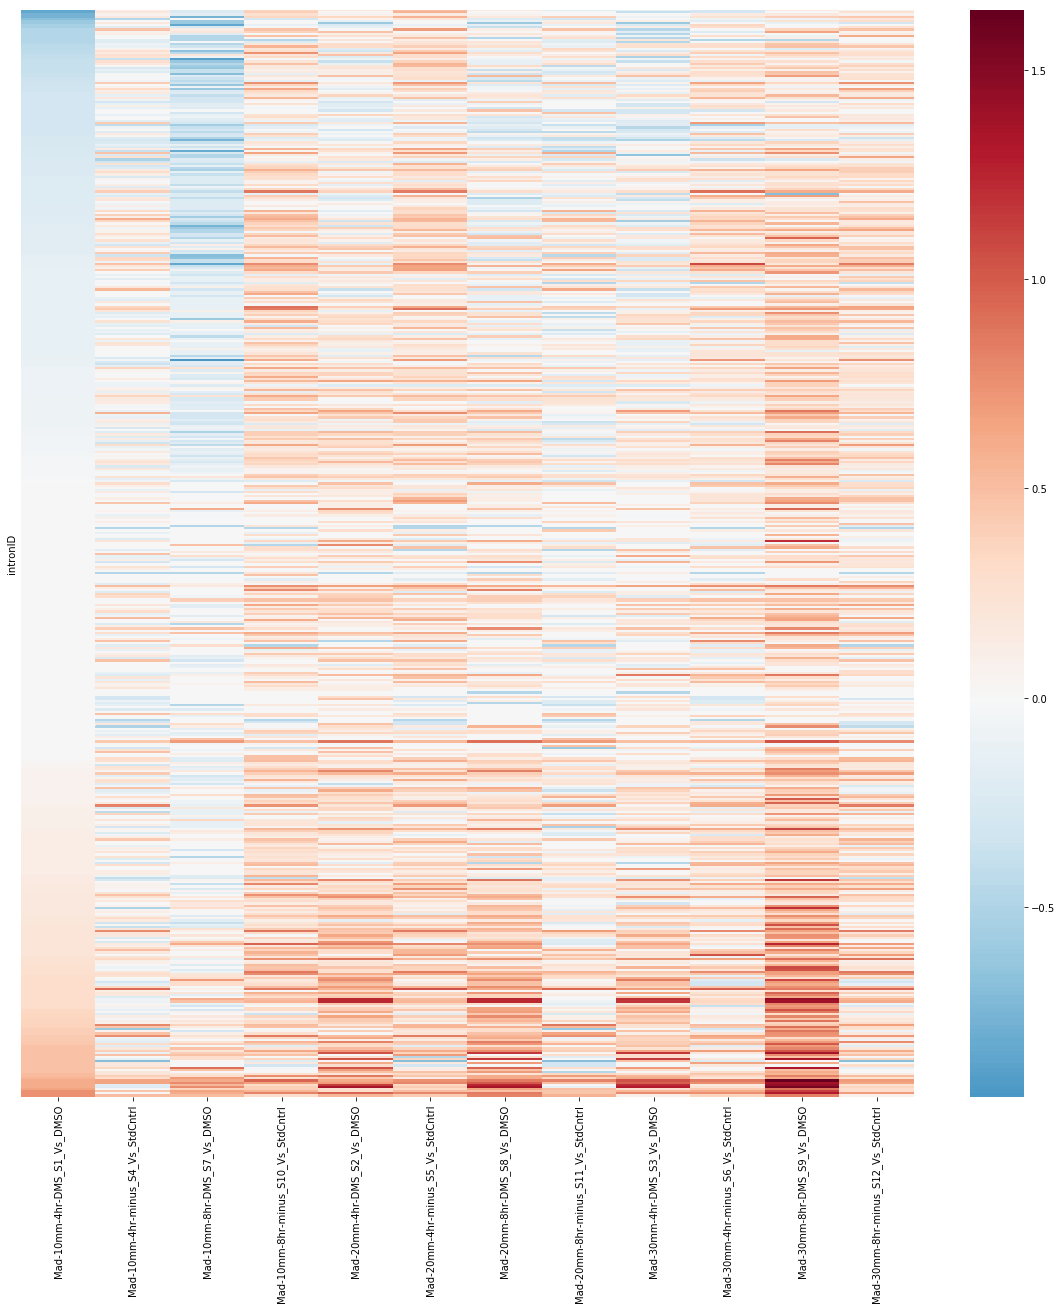

In [26]:
# Plot heatmap
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(introns_log_ratios_sorted,cmap="RdBu_r",yticklabels=False,center=0, ax=ax)
plt.setp( ax.xaxis.get_majorticklabels(), rotation=90 )
#plt.tight_layout()
plt.show()

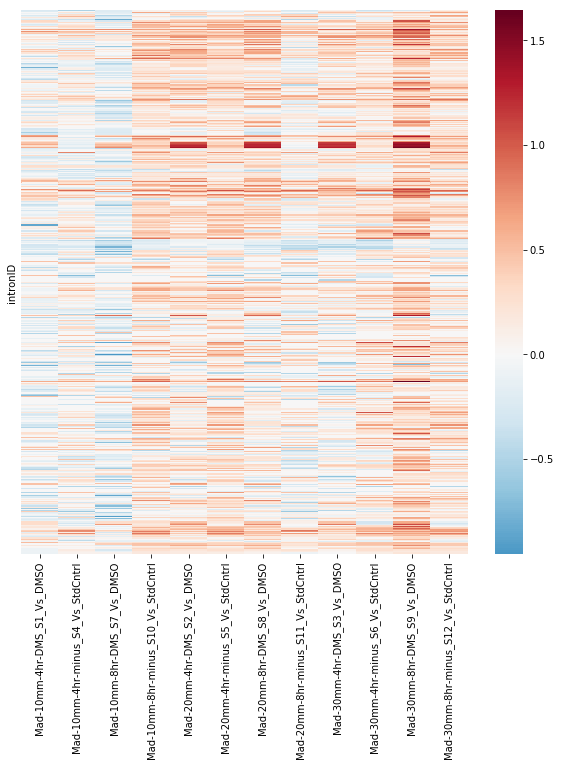

In [17]:
# Plot heatmap unsorted data
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(introns_log_ratios,cmap="RdBu_r",yticklabels=False,center=0,ax=ax)
plt.setp( ax.xaxis.get_majorticklabels(), rotation=90 )
#plt.tight_layout()
plt.show()

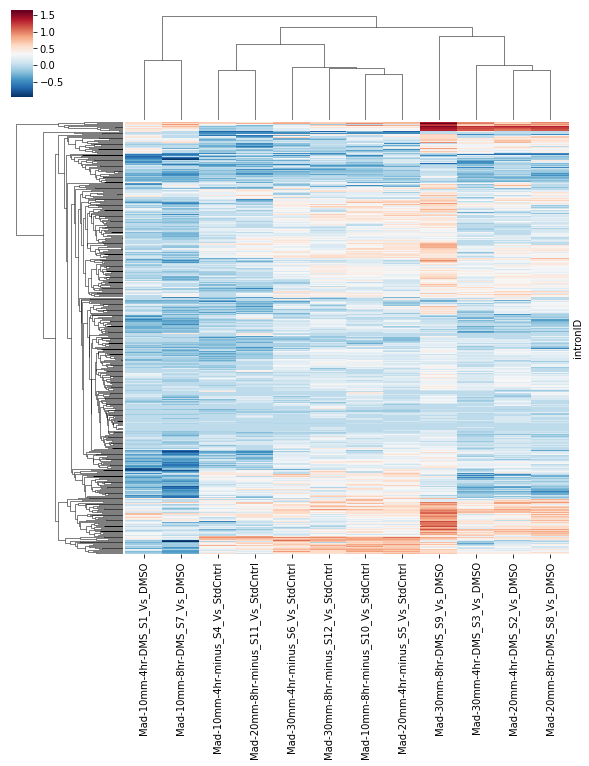

In [22]:
# Plot correlation map
ax = sns.clustermap(introns_log_ratios,cmap="RdBu_r",yticklabels=False)
plt.show()

In [28]:
# This new dataframe contains all experiments we want to compare
DMS_introns_log_ratios = pd.DataFrame({"Mad-10mm-4hr-DMS_S1_Vs_DMSO":np.log10(introns_coord_data_sorted_dropDups["Mad-10mm-4hr-DMS_S1"]/introns_coord_data_sorted_dropDups["DMSO-DMS_S8"]),
                              "Mad-10mm-8hr-DMS_S7_Vs_DMSO":np.log10(introns_coord_data_sorted_dropDups["Mad-10mm-8hr-DMS_S7"]/introns_coord_data_sorted_dropDups["DMSO-DMS_S8"]),
                               "Mad-20mm-4hr-DMS_S2_Vs_DMSO":np.log10(introns_coord_data_sorted_dropDups["Mad-20mm-4hr-DMS_S2"]/introns_coord_data_sorted_dropDups["DMSO-DMS_S8"]),
                               "Mad-20mm-8hr-DMS_S8_Vs_DMSO":np.log10(introns_coord_data_sorted_dropDups["Mad-20mm-8hr-DMS_S8"]/introns_coord_data_sorted_dropDups["DMSO-DMS_S8"]),
                              "Mad-30mm-4hr-DMS_S3_Vs_DMSO":np.log10(introns_coord_data_sorted_dropDups["Mad-30mm-4hr-DMS_S3"]/introns_coord_data_sorted_dropDups["DMSO-DMS_S8"]),
                               "Mad-30mm-8hr-DMS_S9_Vs_DMSO":np.log10(introns_coord_data_sorted_dropDups["Mad-30mm-8hr-DMS_S9"]/introns_coord_data_sorted_dropDups["DMSO-DMS_S8"])})                             
DMS_introns_log_ratios.index = introns_coord_data_sorted_dropDups["intronID"]
DMS_introns_log_ratios.head()

,Mad-10mm-4hr-DMS_S1_Vs_DMSO,Mad-10mm-8hr-DMS_S7_Vs_DMSO,Mad-20mm-4hr-DMS_S2_Vs_DMSO,Mad-20mm-8hr-DMS_S8_Vs_DMSO,Mad-30mm-4hr-DMS_S3_Vs_DMSO,Mad-30mm-8hr-DMS_S9_Vs_DMSO
intronID,,,,,,
NM_001201483.1_intron_0_0_chr1_8861430_r,-0.249877,-0.204120,0.176091,0.118099,0.074634,-0.249877
NM_001201483.1_intron_1_0_chr1_8862946_r,-0.221849,-0.221849,-0.096910,0.342423,0.255273,0.079181
NM_001201483.1_intron_2_0_chr1_8863344_r,0.000000,-0.176091,0.425969,0.000000,0.477121,0.522879
NM_001201483.1_intron_3_0_chr1_8864093_r,-0.096910,-0.154902,0.255273,0.000000,0.230449,0.278754
NM_001201483.1_intron_4_0_chr1_8865483_r,0.000000,-0.051153,0.388180,0.407485,-0.176091,0.124939


In [33]:
DMS_introns_log_ratios.max()

Mad-10mm-4hr-DMS_S1_Vs_DMSO    0.759668
Mad-10mm-8hr-DMS_S7_Vs_DMSO    0.903090
Mad-20mm-4hr-DMS_S2_Vs_DMSO    1.361728
Mad-20mm-8hr-DMS_S8_Vs_DMSO    1.361728
Mad-30mm-4hr-DMS_S3_Vs_DMSO    1.301030
Mad-30mm-8hr-DMS_S9_Vs_DMSO    1.643453
dtype: float64

In [34]:
DMS_introns_log_ratios.min()

Mad-10mm-4hr-DMS_S1_Vs_DMSO   -0.845098
Mad-10mm-8hr-DMS_S7_Vs_DMSO   -0.954243
Mad-20mm-4hr-DMS_S2_Vs_DMSO   -0.602060
Mad-20mm-8hr-DMS_S8_Vs_DMSO   -0.602060
Mad-30mm-4hr-DMS_S3_Vs_DMSO   -0.653213
Mad-30mm-8hr-DMS_S9_Vs_DMSO   -0.698970
dtype: float64

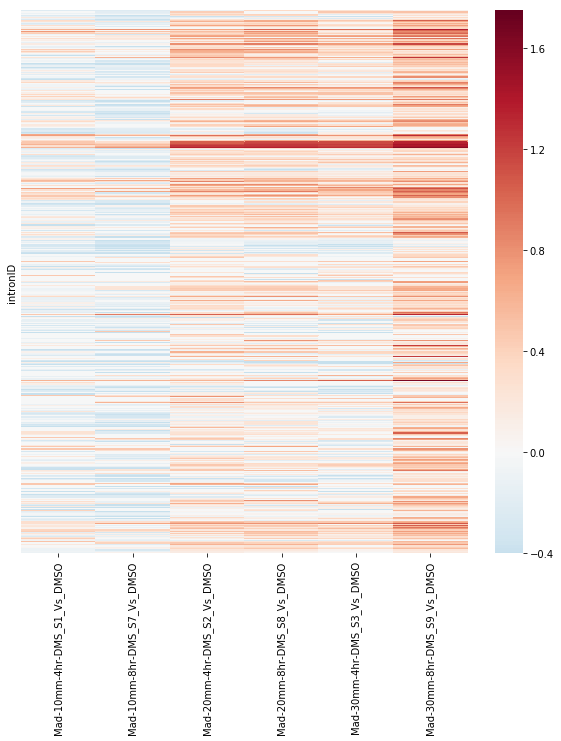

In [38]:
# Plot heatmap unsorted data
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(DMS_introns_log_ratios,vmax=1.75,vmin=-0.4,cmap="RdBu_r",yticklabels=False,center=0,ax=ax)
plt.setp( ax.xaxis.get_majorticklabels(), rotation=90 )
#plt.tight_layout()
plt.show()

In [30]:
# This is the new dataframe that contains all experiments we want to compare: Log Ratios
noDMS_introns_log_ratios = pd.DataFrame({"Mad-10mm-4hr-minus_S4_Vs_StdCntrl":np.log10(introns_coord_data_sorted_dropDups["Mad-10mm-4hr-minus_S4"]/introns_coord_data_sorted_dropDups["Standardcontrol_S12"]),
                              "Mad-10mm-8hr-minus_S10_Vs_StdCntrl":np.log10(introns_coord_data_sorted_dropDups["Mad-10mm-8hr-minus_S10"]/introns_coord_data_sorted_dropDups["Standardcontrol_S12"]),
                              "Mad-20mm-4hr-minus_S5_Vs_StdCntrl":np.log10(introns_coord_data_sorted_dropDups["Mad-20mm-4hr-minus_S5"]/introns_coord_data_sorted_dropDups["Standardcontrol_S12"]),
                              "Mad-20mm-8hr-minus_S11_Vs_StdCntrl":np.log10(introns_coord_data_sorted_dropDups["Mad-20mm-8hr-minus_S11"]/introns_coord_data_sorted_dropDups["Standardcontrol_S12"]),
                               "Mad-30mm-4hr-minus_S6_Vs_StdCntrl":np.log10(introns_coord_data_sorted_dropDups["Mad-30mm-4hr-minus_S6"]/introns_coord_data_sorted_dropDups["Standardcontrol_S12"]),
                              "Mad-30mm-8hr-minus_S12_Vs_StdCntrl":np.log10(introns_coord_data_sorted_dropDups["Mad-30mm-8hr-minus_S12"]/introns_coord_data_sorted_dropDups["Standardcontrol_S12"])})
noDMS_introns_log_ratios.index = introns_coord_data_sorted_dropDups["intronID"]
noDMS_introns_log_ratios.head()

,Mad-10mm-4hr-minus_S4_Vs_StdCntrl,Mad-10mm-8hr-minus_S10_Vs_StdCntrl,Mad-20mm-4hr-minus_S5_Vs_StdCntrl,Mad-20mm-8hr-minus_S11_Vs_StdCntrl,Mad-30mm-4hr-minus_S6_Vs_StdCntrl,Mad-30mm-8hr-minus_S12_Vs_StdCntrl
intronID,,,,,,
NM_001201483.1_intron_0_0_chr1_8861430_r,-0.522879,0.079181,-0.070581,-0.259637,-0.346787,0.113943
NM_001201483.1_intron_1_0_chr1_8862946_r,0.000000,0.066947,-0.176091,-0.176091,-0.176091,0.335792
NM_001201483.1_intron_2_0_chr1_8863344_r,0.221849,0.636822,0.221849,0.000000,0.425969,0.669007
NM_001201483.1_intron_3_0_chr1_8864093_r,-0.146128,-0.146128,-0.032185,-0.301030,0.132626,0.154902
NM_001201483.1_intron_4_0_chr1_8865483_r,0.301030,0.066947,0.034762,0.383217,0.000000,0.034762


In [36]:
noDMS_introns_log_ratios.max()

Mad-10mm-4hr-minus_S4_Vs_StdCntrl     0.940232
Mad-10mm-8hr-minus_S10_Vs_StdCntrl    0.954243
Mad-20mm-4hr-minus_S5_Vs_StdCntrl     1.057992
Mad-20mm-8hr-minus_S11_Vs_StdCntrl    0.954243
Mad-30mm-4hr-minus_S6_Vs_StdCntrl     1.079181
Mad-30mm-8hr-minus_S12_Vs_StdCntrl    0.961082
dtype: float64

In [37]:
noDMS_introns_log_ratios.min()

Mad-10mm-4hr-minus_S4_Vs_StdCntrl    -0.698970
Mad-10mm-8hr-minus_S10_Vs_StdCntrl   -0.477121
Mad-20mm-4hr-minus_S5_Vs_StdCntrl    -0.698970
Mad-20mm-8hr-minus_S11_Vs_StdCntrl   -0.698970
Mad-30mm-4hr-minus_S6_Vs_StdCntrl    -0.537119
Mad-30mm-8hr-minus_S12_Vs_StdCntrl   -0.698970
dtype: float64

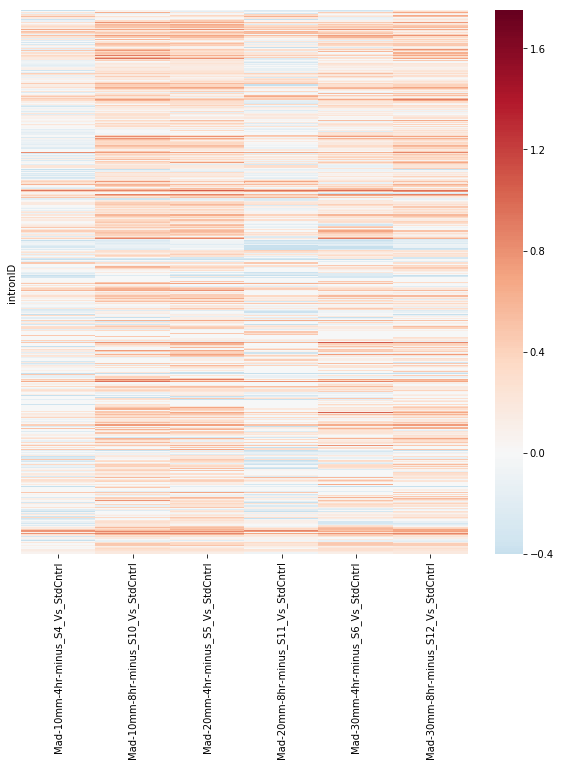

In [39]:
# Plot heatmap unsorted data
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(noDMS_introns_log_ratios,vmax=1.75,vmin=-0.4, cmap="RdBu_r",yticklabels=False,center=0,ax=ax)
plt.setp( ax.xaxis.get_majorticklabels(), rotation=90 )
#plt.tight_layout()
plt.show()